# Introduction

Our Mission is to educate potential buyers on what housing aspects and geographical locations increase the prices of homes. In this notebook, you will se how we researched data and developed a plan, cleaned the data, reorganized the dataset, ran the regression model, and adjusted the dataset accordingly to achieve an acceptable result

# Data Exploration

## Load Libraries and Data

In [59]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Explore the Data

In [60]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

In [61]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [62]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [63]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [64]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [65]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [66]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scrub the Data

In [67]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [68]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [69]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [70]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [71]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [72]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [73]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [74]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [75]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [76]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [77]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

## EDA with Visualizations

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

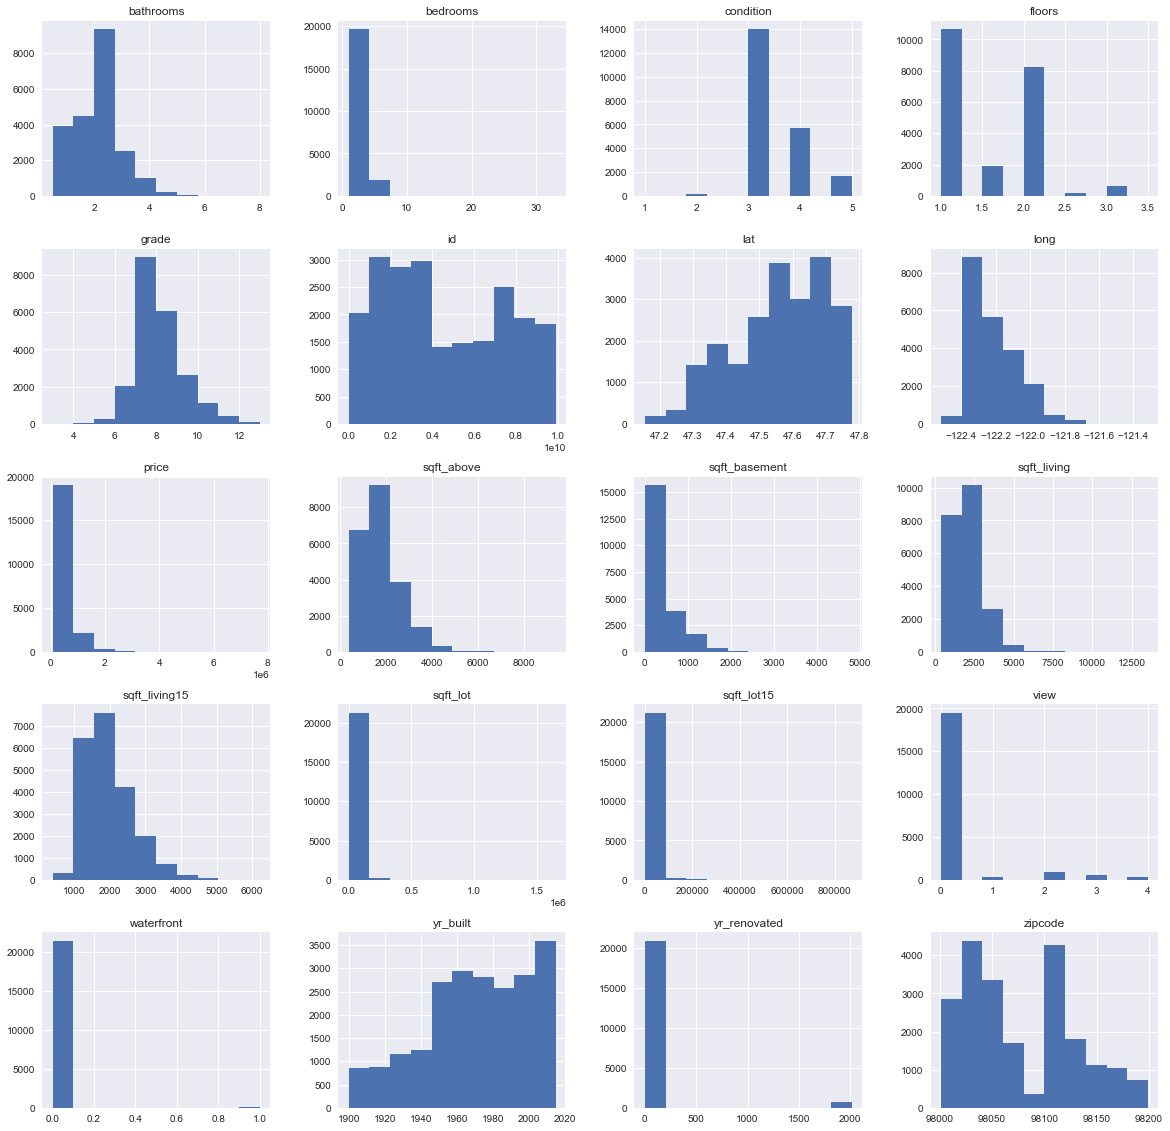

In [78]:
#look at distributions of each column
df.hist(figsize=(20,20));

## Drop Unnecessary Columns

In [79]:
drop_vars = ['id', 'date']
df.drop(columns=drop_vars, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Removing Outliers

In [80]:
# after looking over the data, major outliers were found in the price, bathrooms and bedrooms columns

### Dependant Variable - Price

In [81]:
from numpy import mean
from numpy import std

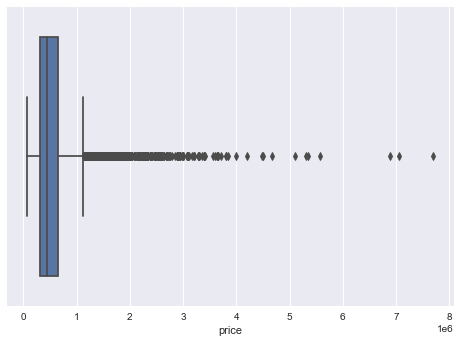

In [82]:
sns.boxplot(x=df['price'])

In [83]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [84]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [85]:
sorted(outliers)

[1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1280000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 132

In [86]:
#subset price to eliminate outliers 
df = df[df.price < 1280000]

### Number of Bedrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


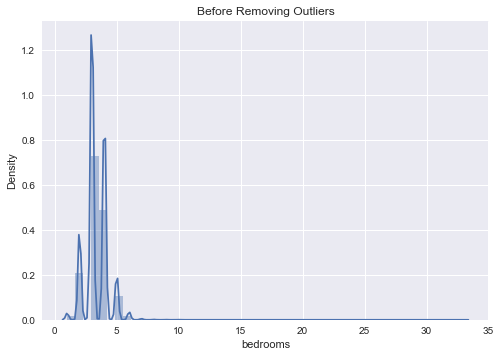

In [87]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [88]:
# remove outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 2

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

484

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


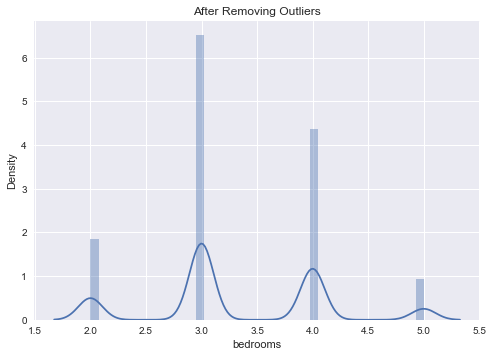

In [89]:
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Number of Bathrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


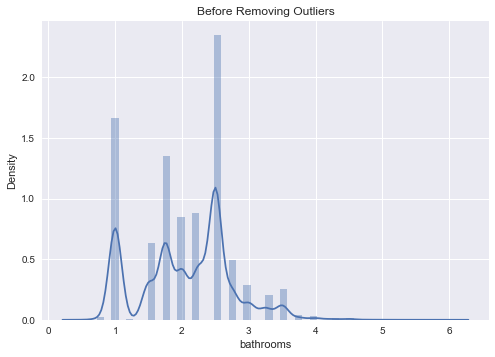

In [90]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [91]:
# remove outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

79

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


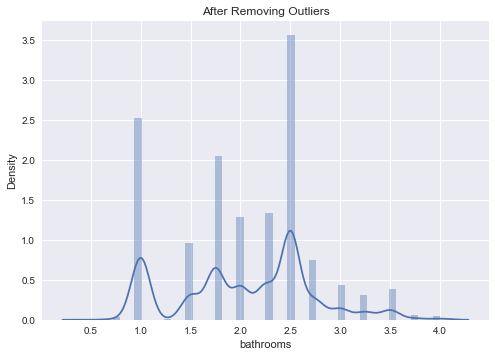

In [92]:
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [93]:
# sqft_living equals sqft_above and sqft_basement so we will drop those columns
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.019300e+04,20193.000000,20193.000000,20193.000000,2.019300e+04,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000
mean,4.857904e+05,3.316842,2.052073,1984.860150,1.456120e+04,1.480662,0.002724,0.179617,3.408409,7.563413,1971.175209,60.385282,98078.233051,47.557336,-122.212768,1935.970980,12415.746645
std,2.220385e+05,0.788903,0.685286,768.711551,3.992876e+04,0.537712,0.052119,0.656233,0.646399,1.045874,29.062561,341.872620,53.312024,0.140815,0.141873,626.091182,26241.063470
min,7.800000e+04,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.170000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.000000,98033.000000,47.461200,-122.329000,1480.000000,5074.000000
50%,4.400000e+05,3.000000,2.250000,1860.000000,7.510000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.567700,-122.229000,1810.000000,7560.000000
75%,6.100000e+05,4.000000,2.500000,2440.000000,1.034900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1996.000000,0.000000,98118.000000,47.679600,-122.122000,2300.000000,9905.000000
max,1.270000e+06,5.000000,4.000000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193 entries, 0 to 21596
Data columns (total 17 columns):
price            20193 non-null float64
bedrooms         20193 non-null int64
bathrooms        20193 non-null float64
sqft_living      20193 non-null int64
sqft_lot         20193 non-null int64
floors           20193 non-null float64
waterfront       20193 non-null float64
view             20193 non-null float64
condition        20193 non-null int64
grade            20193 non-null int64
yr_built         20193 non-null int64
yr_renovated     20193 non-null float64
zipcode          20193 non-null int64
lat              20193 non-null float64
long             20193 non-null float64
sqft_living15    20193 non-null int64
sqft_lot15       20193 non-null int64
dtypes: float64(8), int64(9)
memory usage: 2.8 MB


## Dealing with Categorical Values

In [95]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 700000, 'class_scale'] = "upper"
df.loc[(df['price'] < 700000) & (df['price'] > 300000), 'class_scale'] = "middle"
df.loc[df['price'] < 300000, 'class_scale'] = "lower"

In [96]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

price                                grade             
                 mean       min        max       std  mean min max  std
class_scale                                                            
lower        239386.0   78000.0   299999.0   42946.0   7.0   4   9  1.0
middle       467953.0  300499.0   699999.0  108218.0   8.0   4  11  1.0
upper        874647.0  700180.0  1270000.0  143060.0   9.0   5  12  1.0

In [97]:
df.class_scale.value_counts(normalize=True)

middle    0.618318
lower     0.215866
upper     0.165816
Name: class_scale, dtype: float64

In [98]:
df.view.value_counts(normalize=True)

0.0    0.920220
2.0    0.040014
3.0    0.018026
1.0    0.013817
4.0    0.007924
Name: view, dtype: float64

In [99]:
grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condit', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
class_dummies = pd.get_dummies(df['class_scale'], prefix='class', drop_first=True)
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)

In [100]:
df = df.drop(['grade', 'condition', 'view', 'class_scale','zipcode'], axis=1)
df = pd.concat([df, grade_dummies, condition_dummies, view_dummies, class_dummies,zip_dummies], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,yr_renovated,lat,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,1180,5650,1.0,0.0,1955,0.0,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,1951,1991.0,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,1933,0.0,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,1965,0.0,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,1987,0.0,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df['view1'] = df['view_1.0']
df['view2'] =df['view_2.0']
df['view3'] = df['view_3.0']
df['view4'] = df['view_4.0']
df.drop(['view_1.0', 'view_2.0', 'view_3.0', 'view_4.0'], axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193 entries, 0 to 21596
Data columns (total 100 columns):
price            20193 non-null float64
bedrooms         20193 non-null int64
bathrooms        20193 non-null float64
sqft_living      20193 non-null int64
sqft_lot         20193 non-null int64
floors           20193 non-null float64
waterfront       20193 non-null float64
yr_built         20193 non-null int64
yr_renovated     20193 non-null float64
lat              20193 non-null float64
long             20193 non-null float64
sqft_living15    20193 non-null int64
sqft_lot15       20193 non-null int64
gr_5             20193 non-null uint8
gr_6             20193 non-null uint8
gr_7             20193 non-null uint8
gr_8             20193 non-null uint8
gr_9             20193 non-null uint8
gr_10            20193 non-null uint8
gr_11            20193 non-null uint8
gr_12            20193 non-null uint8
condit_2         20193 non-null uint8
condit_3         20193 non-null uint8
co

In [ ]:
# keep this going 
price = df['price']
bedrooms = data_log['bedrooms']
bathrooms = data_log['bathrooms']
sqft_living = data_log['sqft_living']

In [58]:
scaled_bedrooms = (bedrooms - np.mean(bedrooms)) / (max(bedrooms) - min(bedrooms))
scaled_bathrooms = (bathrooms - np.mean(bathrooms)) / (max(bathrooms) - min(bathrooms))
scaled_sqft_living = (sqft_living - np.mean(sqft_living)) / (max(sqft_living) - min(sqft_living))
scaled_sqft_lot = (sqft_lot - np.mean(sqft_lot)) / (max(sqft_lot) - min(sqft_lot))
scaled_floors = (floors - np.mean(floors)) / (max(floors) - min(floors))
scaled_waterfront = (waterfront - np.mean(waterfront)) / (max(waterfront) - min(waterfront))
scaled_lat = (lat - np.mean(lat)) / (max(lat) - min(lat))
scaled_long = (long - np.mean(long)) / (max(long) - min(long))
scaled_sqft15 = (sqft_living15 - np.mean(sqft_living15)) / (max(sqft_living15) - min(sqft_living15))
scaled_lot15 = (sqft_lot15 - np.mean(sqft_lot15)) / (max(sqft_lot15) - min(sqft_lot15))
scaled_gr5 = (gr_5 - np.mean(gr_5)) / (max(gr_5) - min(gr_5))
scaled_gr6 = (gr_6 - np.mean(gr_6)) / (max(gr_6) - min(gr_6))
scaled_gr7 = (gr_7 - np.mean(gr_7)) / (max(gr_7) - min(gr_7))
scaled_gr8 = (gr_8 - np.mean(gr_8)) / (max(gr_8) - min(gr_8))
scaled_gr9 = (gr_9 - np.mean(gr_9)) / (max(gr_9) - min(gr_9))
scaled_gr10 = (gr_10 - np.mean(gr_10)) / (max(gr_10) - min(gr_10))
scaled_gr11 = (gr_11 - np.mean(gr_11)) / (max(gr_11) - min(gr_11))
scaled_gr12 = (gr_12 - np.mean(gr_12)) / (max(gr_12) - min(gr_12))
scaled_condit_2 = (condit_2 - np.mean(condit_2)) / (max(condit_2) - min(condit_2))
scaled_condit_3 = (condit_3 - np.mean(condit_3)) / (max(condit_3) - min(condit_3))
scaled_condit_4 = (condit_4 - np.mean(condit_4)) / (max(condit_4) - min(condit_4))
scaled_condit_5 = (condit_5 - np.mean(condit_5)) / (max(condit_5) - min(condit_5))
scaled_view1 = (view1 - np.mean(view1)) / (max(view1) - min(view1))
scaled_view2 = (view2 - np.mean(view2)) / (max(view2) - min(view2))
scaled_view3 = (view3 - np.mean(view3)) / (max(view3) - min(view3))
scaled_view4 = (view4 - np.mean(view4)) / (max(view4) - min(view4))


NameError: name 'bedrooms' is not defined

# Linear Regression

## Model 1

In [48]:
# import libraries
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

In [53]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 
          'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_3', 'condit_4', 
          'condit_5', 'view1', 'view2', 'view3', 'view4', 'class_middle', 'class_upper',
           'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166', 'zip_98177', 'zip_98199']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model1 = smf.ols(formula=f, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1899.
Date:                Thu, 24 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:58:19   Log-Likelihood:            -2.5481e+05
No. Observations:               20193   AIC:                         5.098e+05
Df Residuals:                   20105   BIC:                         5.105e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.292e+07   1.82e+06     -7.110      0.000   -1.65e+07   -9.36e+06
bedrooms       -643.7027    859.837     -0.749      0.454   -2329.054    1041.649
bathrooms      7332.0258   1230.719      5.958      0.000    4919.716    9744.335
sqft_living      66.1894      1.458     45.388      0.000      63.331      69.048
sqft_lot          0.2091      0.019     11.278      0.000       0.173       0.245
floors        -8022.2146   1272.149     -6.306      0.000   -1.05e+04   -5528.698
waterfront     1.477e+05   1.14e+04     12.927      0.000    1.25e+05     1.7e+05
lat            1.432e+05    1.7e+04      8.416      0.000     1.1e+05    1.77e+05
long          -5.011e+04   1.45e+04     -3.465      0.001   -7.85e+04   -2.18e+04
sqft_living15    24.3962      1.470     16.593      0.000      21.514      27.278
sqft_lot15        0.0458      0.029      1.568      0.117      -0.011       0.103
gr_5          -3432.5368   1.97e+04     -0.174      0.862    -4.2e+04    3.51e+04
gr_6           4554.2247   1.91e+04      0.239      0.811   -3.29e+04     4.2e+04
gr_7           2.211e+04   1.91e+04      1.160      0.246   -1.52e+04    5.95e+04
gr_8           5.101e+04   1.91e+04      2.668      0.008    1.35e+04    8.85e+04
gr_9           9.099e+04   1.92e+04      4.734      0.000    5.33e+04    1.29e+05
gr_10          1.118e+05   1.94e+04      5.758      0.000    7.38e+04     1.5e+05
gr_11          1.909e+05   2.02e+04      9.472      0.000    1.51e+05     2.3e+05
gr_12          2.334e+05   3.58e+04      6.525      0.000    1.63e+05    3.04e+05
condit_2       4.432e+04   1.65e+04      2.688      0.007     1.2e+04    7.66e+04
condit_3        6.93e+04   1.55e+04      4.477      0.000     3.9e+04    9.96e+04
condit_4       8.488e+04   1.55e+04      5.479      0.000    5.45e+04    1.15e+05
condit_5       1.088e+05   1.56e+04      6.985      0.000    7.83e+04    1.39e+05
view1          3.575e+04   4520.932      7.908      0.000    2.69e+04    4.46e+04
view2          3.786e+04   2743.161     13.803      0.000    3.25e+04    4.32e+04
view3          6.609e+04   4018.799     16.446      0.000    5.82e+04     7.4e+04
view4          1.066e+05   6704.127     15.897      0.000    9.34e+04     1.2e+05
class_middle   5.974e+04   1777.724     33.604      0.000    5.63e+04    6.32e+04
class_upper    2.645e+05   2911.386     90.857      0.000    2.59e+05     2.7e+05
zip_98004      3.075e+05   7314.879     42.034      0.000    2.93e+05    3.22e+05
zip_98005      1.776e+05   7523.112     23.604      0.000    1.63e+05    1.92e+05
zip_98006      1.528e+05   5343.177     28.590      0.000    1.42e+05    1.63e+05
zip_98007      1.455e+05   7946.907     18.308      0.000     1.3e+05    1.61e+05
zip_98008      1.503e+05   6666.263     22.544      0.000    1.37e+05    1.63e+05
zip_98010        7.2e+04   8197.252      8.783   

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


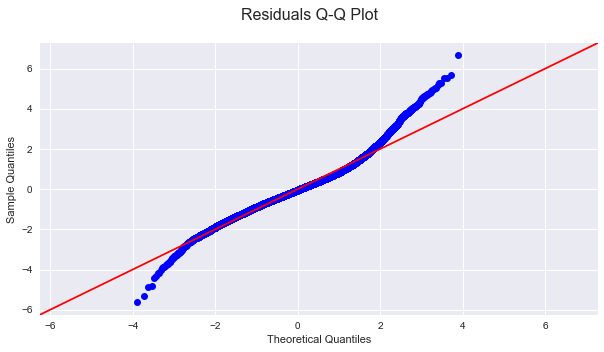

In [54]:
# qq plot
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [52]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model1.resid)/ len(model1.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 3.653e-07


## Location Variables

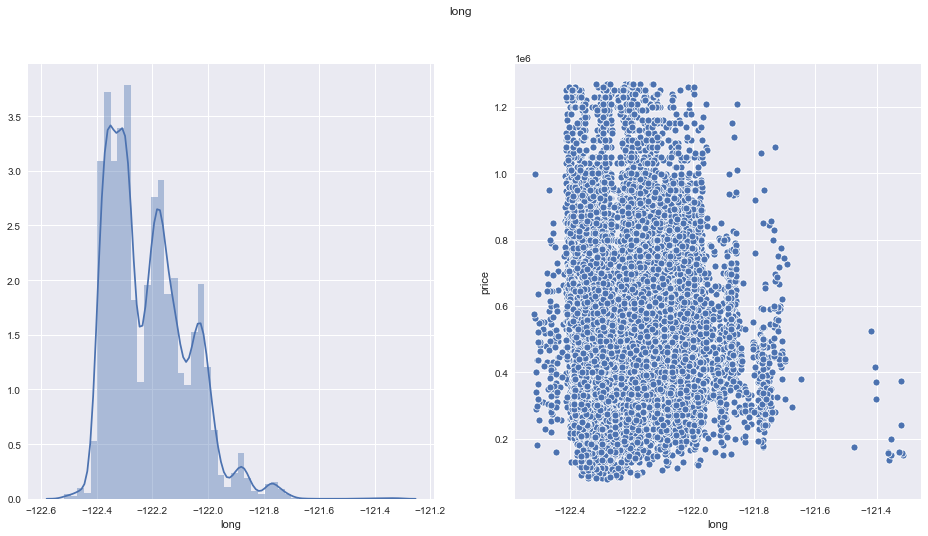

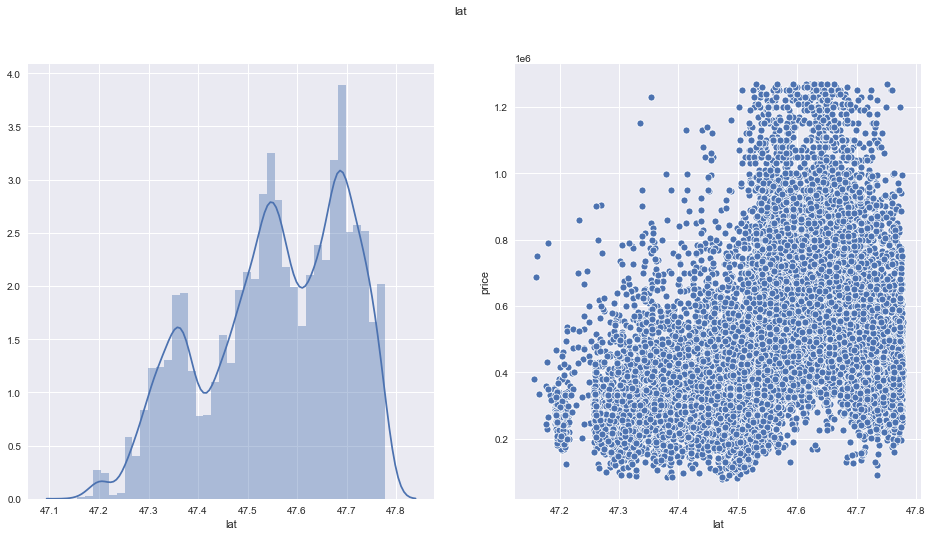

In [387]:
target = df['price'].copy()
location = df[['long', 'lat']].copy()

for col in location:
    x = location[col]
    y = target

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.distplot(x)
    plt.subplot(1,2,2)

    sns.scatterplot(x, y)
    plt.suptitle(col)
    plt.tight_layout

In [388]:
location.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [389]:
location['long_lat'] = list(zip(location['long'], location['lat']))
location.head()

,long,lat,long_lat
0,-122.257,47.5112,"(-122.257, 47.5112)"
1,-122.319,47.7210,"(-122.319, 47.721000000000004)"
2,-122.233,47.7379,"(-122.23299999999999, 47.7379)"
3,-122.393,47.5208,"(-122.39299999999999, 47.5208)"
4,-122.045,47.6168,"(-122.045, 47.6168)"


In [390]:
# calculate distance from point A to Seattle using haversine
from math import radians, cos, sin, asin, sqrt

def haversine(list_long_lat, other=[-122.336283, 47.609395]):

    lon1, lat1 = list_long_lat[0], list_long_lat[1]
    lon2, lat2 = other[0], other[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [391]:
location['dist_to_seattle'] = location['long_lat'].apply(haversine)

In [392]:
# add bellevue to locations
location['dist_to_bellevue'] = location['long_lat'].apply(haversine, other=[-122.198985, 47.615577])

In [393]:
feat_engineer = location.loc[:,['dist_to_seattle', 'dist_to_bellevue']]

In [394]:
feat_engineer.head()

,dist_to_seattle,dist_to_bellevue
0,12.434278,12.395639
1,12.477217,14.770934
2,16.247460,13.838051
3,10.731122,17.970486
4,21.850148,11.542868


In [395]:
# drop the original lat and long columns and join the feature engineered columns
df.drop(['lat', 'long'], axis=1)
df['dist_to_seattle'] = feat_engineer['dist_to_seattle']
df['dist_to_bellevue'] = feat_engineer['dist_to_bellevue']
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,yr_renovated,zipcode,...,condit_4,condit_5,class_middle,class_upper,view1,view2,view3,view4,dist_to_seattle,dist_to_bellevue
count,2.019300e+04,20193.000000,20193.000000,20193.000000,2.019300e+04,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,...,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000,20193.000000
mean,4.857904e+05,3.316842,2.052073,1984.860150,1.456120e+04,1.480662,0.002724,1971.175209,60.385282,98078.233051,...,0.264498,0.076957,0.611796,0.164067,0.013817,0.040014,0.018026,0.007924,18.995772,17.785696
std,2.220385e+05,0.788903,0.685286,768.711551,3.992876e+04,0.537712,0.052119,29.062561,341.872620,53.312024,...,0.441076,0.266530,0.487353,0.370345,0.116732,0.195997,0.133049,0.088663,10.814828,9.222445
min,7.800000e+04,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,1900.000000,0.000000,98001.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.355938,0.640900
25%,3.170000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,1952.000000,0.000000,98033.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.036280,11.677710
50%,4.400000e+05,3.000000,2.250000,1860.000000,7.510000e+03,1.000000,0.000000,1975.000000,0.000000,98065.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.065320,15.481455
75%,6.100000e+05,4.000000,2.500000,2440.000000,1.034900e+04,2.000000,0.000000,1996.000000,0.000000,98118.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.943775,21.926369
max,1.270000e+06,5.000000,4.000000,7350.000000,1.651359e+06,3.500000,1.000000,2015.000000,2015.000000,98199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.319065,67.048043


## Model 2

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             20193 non-null  float64
 1   bedrooms          20193 non-null  int64  
 2   bathrooms         20193 non-null  float64
 3   sqft_living       20193 non-null  int64  
 4   sqft_lot          20193 non-null  int64  
 5   floors            20193 non-null  float64
 6   waterfront        20193 non-null  float64
 7   yr_built          20193 non-null  int64  
 8   yr_renovated      20193 non-null  float64
 9   zipcode           20193 non-null  int64  
 10  lat               20193 non-null  float64
 11  long              20193 non-null  float64
 12  sqft_living15     20193 non-null  int64  
 13  sqft_lot15        20193 non-null  int64  
 14  gr_5              20193 non-null  uint8  
 15  gr_6              20193 non-null  uint8  
 16  gr_7              20193 non-null  uint8 

In [397]:
# try the model with the new columns
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 
          'yr_renovated', 'zipcode', 'dist_to_bellevue', 'dist_to_seattle', 'sqft_living15', 
          'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 
          'condit_3', 'condit_4', 'condit_5', 'view1', 'view2', 'view3', 'view4', 'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model2 = smf.ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     3629.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:22:56   Log-Likelihood:            -2.5822e+05
No. Observations:               20193   AIC:                         5.165e+05
Df Residuals:                   20161   BIC:                         5.168e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.823e+07   1.59e+06     11.498      0.000    1.51e+07    2.13e+07
bedrooms         -9356.8656   1007.005     -9.292      0.000   -1.13e+04   -7383.053
bathrooms         1.622e+04   1536.758     10.552      0.000    1.32e+04    1.92e+04
sqft_living         44.0534      1.706     25.823      0.000      40.710      47.397
sqft_lot             0.1772      0.022      8.108      0.000       0.134       0.220
floors            1.366e+04   1498.353      9.119      0.000    1.07e+04    1.66e+04
waterfront        9.411e+04   1.32e+04      7.116      0.000    6.82e+04     1.2e+05
yr_built          -874.5946     35.345    -24.744      0.000    -943.874    -805.315
yr_renovated         7.3899      1.887      3.915      0.000       3.691      11.089
zipcode           -166.9456     16.134    -10.348      0.000    -198.569    -135.322
dist_to_bellevue -3568.4840    159.962    -22.308      0.000   -3882.023   -3254.945
dist_to_seattle  -1763.4622    162.786    -10.833      0.000   -2082.535   -1444.389
sqft_living15       22.0264      1.685     13.072      0.000      18.724      25.329
sqft_lot15           0.1063      0.034      3.163      0.002       0.040       0.172
gr_5              1.842e+04   2.32e+04      0.794      0.427   -2.71e+04    6.39e+04
gr_6              3.459e+04   2.25e+04      1.536      0.125   -9562.983    7.87e+04
gr_7              7.579e+04   2.25e+04      3.366      0.001    3.17e+04     1.2e+05
gr_8              1.162e+05   2.26e+04      5.143      0.000    7.19e+04     1.6e+05
gr_9              1.595e+05   2.27e+04      7.016      0.000    1.15e+05    2.04e+05
gr_10              1.78e+05    2.3e+04      7.751      0.000    1.33e+05    2.23e+05
gr_11             2.489e+05   2.38e+04     10.446      0.000    2.02e+05    2.96e+05
gr_12              3.12e+05   4.22e+04      7.388      0.000    2.29e+05    3.95e+05
condit_2          2.181e+04   1.94e+04      1.122      0.262   -1.63e+04    5.99e+04
condit_3          5.314e+04   1.83e+04      2.911      0.004    1.74e+04    8.89e+04
condit_4          6.324e+04   1.83e+04      3.464      0.001    2.75e+04     9.9e+04
condit_5          8.128e+04   1.84e+04      4.428      0.000    4.53e+04    1.17e+05
view1             3.168e+04   5294.267      5.983      0.000    2.13e+04    4.21e+04
view2             3.337e+04   3206.153     10.409      0.000    2.71e+04    3.97e+04
view3             5.293e+04   4704.225     11.252      0.000    4.37e+04    6.22e+04
view4             8.223e+04   7858.572     10.464      0.000    6.68e+04    9.76e+04
class_middle      1.136e+05   1872.455     60.682      0.000     1.1e+05    1.17e+05
class_upper       3.746e+05   3075.261    121.803      0.000    3.69e+05    3.81e+05
==============================================================================
Omnibus:                     

<ipython-input-398-370b3596e1db>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


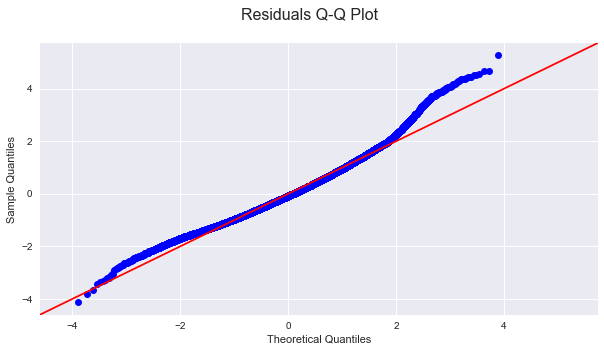

In [398]:
# qq plot
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [399]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model2.resid)/ len(model2.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -1.993e-07


## Checking Assumptions

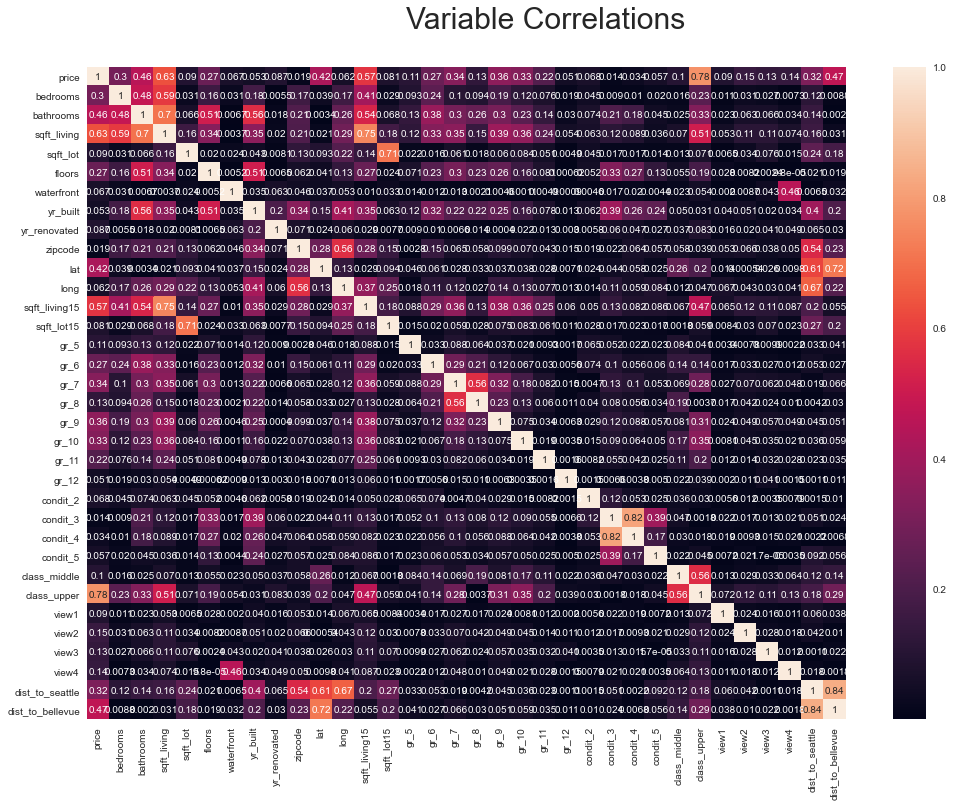

In [400]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [401]:
# the heatmap does not provide much
# create functions to find any multicollinearity issues
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [402]:
# usually any variables that correlate more than 80% have multicollinearity
# one of those columns will need to be dropped
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.816651,"[condit_3, condit_4]"
1,0.816651,"[condit_4, condit_3]"
2,0.839636,"[dist_to_seattle, dist_to_bellevue]"
3,0.839636,"[dist_to_bellevue, dist_to_seattle]"


In [403]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
7,0.775884,class_upper
1,0.633714,sqft_living
3,0.574486,sqft_living15
9,0.470644,dist_to_bellevue
0,0.455541,bathrooms
2,0.420662,lat
5,0.358555,gr_9
4,0.338122,gr_7
6,0.333539,gr_10
8,0.320136,dist_to_seattle


## Create Interactions

In [404]:
# this increased the r-squared slightly
df['interaction_dist'] = df['dist_to_bellevue'] * df['dist_to_seattle']

## Model 3

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             20193 non-null  float64
 1   bedrooms          20193 non-null  int64  
 2   bathrooms         20193 non-null  float64
 3   sqft_living       20193 non-null  int64  
 4   sqft_lot          20193 non-null  int64  
 5   floors            20193 non-null  float64
 6   waterfront        20193 non-null  float64
 7   yr_built          20193 non-null  int64  
 8   yr_renovated      20193 non-null  float64
 9   zipcode           20193 non-null  int64  
 10  lat               20193 non-null  float64
 11  long              20193 non-null  float64
 12  sqft_living15     20193 non-null  int64  
 13  sqft_lot15        20193 non-null  int64  
 14  gr_5              20193 non-null  uint8  
 15  gr_6              20193 non-null  uint8  
 16  gr_7              20193 non-null  uint8 

In [406]:
# replace variables with interactions and drop condit_3
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 
          'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 
          'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_4', 'condit_5', 'view1', 'view2', 'view3', 'view4', 
          'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model3 = smf.ols(formula=f, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3599.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:23:12   Log-Likelihood:            -2.5886e+05
No. Observations:               20193   AIC:                         5.178e+05
Df Residuals:                   20163   BIC:                         5.180e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.902e+07   1.41e+06     13.498      0.000    1.63e+07    2.18e+07
bedrooms         -9409.0119   1038.240     -9.062      0.000   -1.14e+04   -7373.976
bathrooms         1.753e+04   1581.633     11.082      0.000    1.44e+04    2.06e+04
sqft_living         38.6605      1.752     22.065      0.000      35.226      42.095
sqft_lot             0.1533      0.023      6.802      0.000       0.109       0.197
floors             1.54e+04   1527.802     10.081      0.000    1.24e+04    1.84e+04
waterfront         7.59e+04   1.36e+04      5.565      0.000    4.92e+04    1.03e+05
yr_built         -1039.0500     34.641    -29.994      0.000   -1106.950    -971.150
yr_renovated         5.9095      1.945      3.038      0.002       2.097       9.722
zipcode           -171.9904     14.201    -12.111      0.000    -199.826    -144.155
sqft_living15       20.0238      1.687     11.867      0.000      16.716      23.331
sqft_lot15           0.0575      0.035      1.662      0.096      -0.010       0.125
gr_5              3.105e+04   2.39e+04      1.296      0.195   -1.59e+04     7.8e+04
gr_6               4.94e+04   2.32e+04      2.128      0.033    3901.685    9.49e+04
gr_7               9.15e+04   2.32e+04      3.945      0.000     4.6e+04    1.37e+05
gr_8              1.333e+05   2.33e+04      5.728      0.000    8.77e+04    1.79e+05
gr_9              1.778e+05   2.34e+04      7.597      0.000    1.32e+05    2.24e+05
gr_10              1.96e+05   2.37e+04      8.286      0.000     1.5e+05    2.42e+05
gr_11             2.689e+05   2.45e+04     10.955      0.000    2.21e+05    3.17e+05
gr_12             3.381e+05   4.35e+04      7.766      0.000    2.53e+05    4.23e+05
condit_2         -3.022e+04   7280.403     -4.151      0.000   -4.45e+04   -1.59e+04
condit_4          9148.5835   1597.195      5.728      0.000    6017.952    1.23e+04
condit_5          2.735e+04   2585.860     10.578      0.000    2.23e+04    3.24e+04
view1             3.061e+04   5454.685      5.612      0.000    1.99e+04    4.13e+04
view2             3.267e+04   3301.689      9.894      0.000    2.62e+04    3.91e+04
view3             5.123e+04   4846.172     10.571      0.000    4.17e+04    6.07e+04
view4             7.712e+04   8104.479      9.516      0.000    6.12e+04     9.3e+04
class_middle      1.279e+05   1888.668     67.745      0.000    1.24e+05    1.32e+05
class_upper       4.038e+05   3063.840    131.782      0.000    3.98e+05     4.1e+05
interaction_dist   -83.5660      1.727    -48.383      0.000     -86.951     -80.181
==============================================================================
Omnibus:                     1726.311   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2577.257
Skew:                           0.674   P

<ipython-input-407-fb0070ecdd81>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


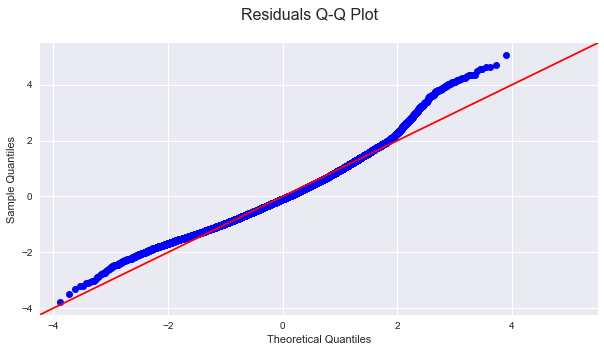

In [407]:
# qq plot
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [408]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model3.resid)/ len(model3.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 4.365e-07


## Normalize Features

In [410]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])
df['sqft_lot'] = np.log(df['sqft_lot'])
df['floors'] = np.log(df['floors'])
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_lot15'] = np.log(df['sqft_lot15'])

## Model 4

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20193 entries, 0 to 21596
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             20193 non-null  float64
 1   bedrooms          20193 non-null  int64  
 2   bathrooms         20193 non-null  float64
 3   sqft_living       20193 non-null  float64
 4   sqft_lot          20193 non-null  float64
 5   floors            20193 non-null  float64
 6   waterfront        20193 non-null  float64
 7   yr_built          20193 non-null  int64  
 8   yr_renovated      20193 non-null  float64
 9   zipcode           20193 non-null  int64  
 10  lat               20193 non-null  float64
 11  long              20193 non-null  float64
 12  sqft_living15     20193 non-null  float64
 13  sqft_lot15        20193 non-null  float64
 14  gr_5              20193 non-null  uint8  
 15  gr_6              20193 non-null  uint8  
 16  gr_7              20193 non-null  uint8 

In [413]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 
          'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 
          'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_4', 'condit_5', 'view1', 'view2', 'view3', 'view4', 
          'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model4 = smf.ols(formula=f, data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     3503.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:24:31   Log-Likelihood:                 5396.5
No. Observations:               20193   AIC:                        -1.073e+04
Df Residuals:                   20163   BIC:                        -1.050e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.4550      2.945     15.774      0.000      40.682      52.228
bedrooms            -0.0267      0.002    -12.228      0.000      -0.031      -0.022
bathrooms            0.0352      0.003     10.549      0.000       0.029       0.042
sqft_living          0.1708      0.007     23.230      0.000       0.156       0.185
sqft_lot             0.0094      0.004      2.425      0.015       0.002       0.017
floors               0.0548      0.005     10.773      0.000       0.045       0.065
waterfront           0.1549      0.028      5.469      0.000       0.099       0.210
yr_built            -0.0020   7.16e-05    -28.104      0.000      -0.002      -0.002
yr_renovated       8.54e-06   4.04e-06      2.116      0.034    6.29e-07    1.65e-05
zipcode             -0.0003   2.96e-05    -11.119      0.000      -0.000      -0.000
sqft_living15        0.0944      0.007     13.611      0.000       0.081       0.108
sqft_lot15          -0.0026      0.004     -0.625      0.532      -0.011       0.006
gr_5                 0.1427      0.050      2.874      0.004       0.045       0.240
gr_6                 0.2367      0.048      4.915      0.000       0.142       0.331
gr_7                 0.3417      0.048      7.095      0.000       0.247       0.436
gr_8                 0.4230      0.048      8.750      0.000       0.328       0.518
gr_9                 0.5058      0.049     10.399      0.000       0.410       0.601
gr_10                0.5207      0.049     10.605      0.000       0.424       0.617
gr_11                0.5811      0.051     11.430      0.000       0.481       0.681
gr_12                0.6220      0.090      6.897      0.000       0.445       0.799
condit_2            -0.1162      0.015     -7.693      0.000      -0.146      -0.087
condit_4             0.0182      0.003      5.466      0.000       0.012       0.025
condit_5             0.0543      0.005     10.108      0.000       0.044       0.065
view1                0.0528      0.011      4.668      0.000       0.031       0.075
view2                0.0610      0.007      8.917      0.000       0.048       0.074
view3                0.0832      0.010      8.289      0.000       0.064       0.103
view4                0.0977      0.017      5.813      0.000       0.065       0.131
class_middle         0.4321      0.004    110.402      0.000       0.424       0.440
class_upper          0.8263      0.006    131.036      0.000       0.814       0.839
interaction_dist    -0.0002   3.65e-06    -48.807      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      494.102   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.608
Skew:                          -0.000   P

<ipython-input-415-d35a816d5623>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


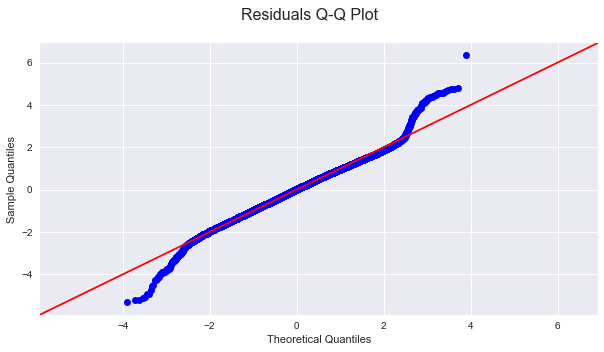

In [415]:
# qq plot
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [416]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model4.resid)/ len(model4.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -9.178e-12


## Model 5

In [423]:
# remove sqft_lot15 because it has a P value over .05
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 
          'yr_renovated', 'zipcode', 'sqft_living15', 'gr_5', 'gr_6', 'gr_7', 'gr_8', 'gr_9', 
          'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_4', 'condit_5', 'view1', 'view2', 'view3', 'view4', 
          'class_middle', 'class_upper', 'interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model5 = smf.ols(formula=f, data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     3628.
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:27:48   Log-Likelihood:                 5396.3
No. Observations:               20193   AIC:                        -1.073e+04
Df Residuals:                   20164   BIC:                        -1.051e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.4842      2.945     15.786      0.000      40.712      52.256
bedrooms            -0.0267      0.002    -12.229      0.000      -0.031      -0.022
bathrooms            0.0353      0.003     10.571      0.000       0.029       0.042
sqft_living          0.1709      0.007     23.261      0.000       0.157       0.185
sqft_lot             0.0073      0.002      3.808      0.000       0.004       0.011
floors               0.0549      0.005     10.832      0.000       0.045       0.065
waterfront           0.1542      0.028      5.449      0.000       0.099       0.210
yr_built            -0.0020   7.14e-05    -28.193      0.000      -0.002      -0.002
yr_renovated      8.441e-06   4.03e-06      2.093      0.036    5.36e-07    1.63e-05
zipcode             -0.0003   2.96e-05    -11.130      0.000      -0.000      -0.000
sqft_living15        0.0939      0.007     13.632      0.000       0.080       0.107
gr_5                 0.1426      0.050      2.872      0.004       0.045       0.240
gr_6                 0.2368      0.048      4.916      0.000       0.142       0.331
gr_7                 0.3417      0.048      7.096      0.000       0.247       0.436
gr_8                 0.4231      0.048      8.751      0.000       0.328       0.518
gr_9                 0.5057      0.049     10.398      0.000       0.410       0.601
gr_10                0.5205      0.049     10.602      0.000       0.424       0.617
gr_11                0.5809      0.051     11.427      0.000       0.481       0.681
gr_12                0.6214      0.090      6.890      0.000       0.445       0.798
condit_2            -0.1160      0.015     -7.683      0.000      -0.146      -0.086
condit_4             0.0181      0.003      5.440      0.000       0.012       0.025
condit_5             0.0541      0.005     10.091      0.000       0.044       0.065
view1                0.0528      0.011      4.666      0.000       0.031       0.075
view2                0.0611      0.007      8.925      0.000       0.048       0.075
view3                0.0832      0.010      8.287      0.000       0.063       0.103
view4                0.0977      0.017      5.815      0.000       0.065       0.131
class_middle         0.4322      0.004    110.414      0.000       0.424       0.440
class_upper          0.8264      0.006    131.129      0.000       0.814       0.839
interaction_dist    -0.0002   3.65e-06    -48.898      0.000      -0.000      -0.000
==============================================================================
Omnibus:                      494.654   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.602
Skew:                           0.000   Prob(JB):                    2.15e-258
Kurtosis:                       4.188   Cond. N

<ipython-input-424-595093a3b697>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


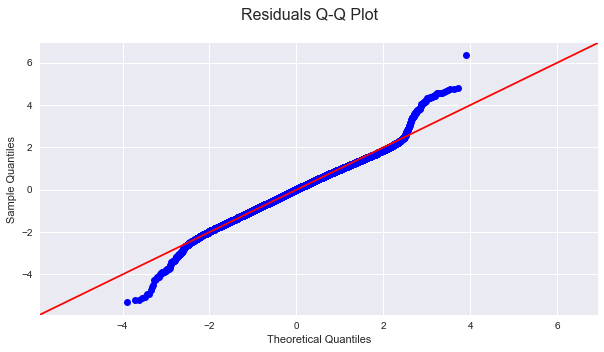

In [424]:
# qq plot
residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.savefig('finalmodel.png')
fig.show()

In [425]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model5.resid)/ len(model5.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.811e-12


# Homoscedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

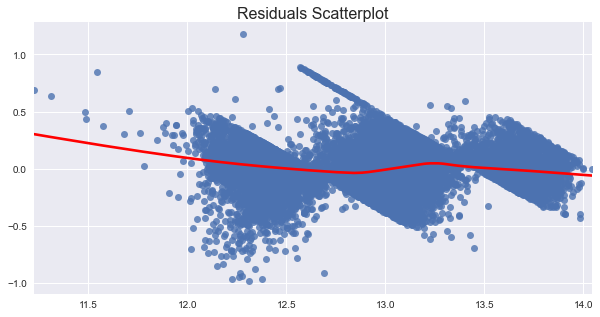

In [426]:
plt.figure(figsize=(10,5))
sns.regplot(x=model5.predict(), y=model5.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [427]:
# the model is mostly homoscedastic

# Model Validation

In [428]:
# import libraries
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [429]:
# create test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(df, df.price)
train, test = train_test_split(df,test_size=.25,shuffle=True)

In [430]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [431]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15144, 35) (15144,) (5049, 35) (5049,)


In [432]:
# look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15144, 35) (15144,) (5049, 35) (5049,)


In [433]:
# use the model to predict y values for the test and train data
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

In [434]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], model4.predict(train))
test_r2 = r2_score(test['price'], model4.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')

Mean Squared Error Train: 1.4427164493740468e-06
Mean Squared Error Test: 1.2979305444038845e-05
R-Squared Train = 0.84
R-Squared Test = 0.83


In [435]:
# The MSE and R squared values for the train and test subsets are similar
# this suggests that the model will perform similarly on different data.

# Conclusions

We found that there is a strong correlation between the price of a home and the number of bathrooms. Buyers who want to save money should search for homes with less bathrooms. Also, as the living space of your neighbors (in terms of sqft) increases, price increases. Buyers should look for homes in a neighborhood that has smaller houses.

When it comes to location, the closer the home is to a city, the more expensive it will be. It is also more expensive to live near Bellevue than it is to live near Seattle.